
k: número de eventos
e: número de Euler
λ: é a média

P(k) = [λ^k * e^(-λ)] / k!


In [11]:
import numpy as np
from scipy.stats import poisson

size = 1000
mean = 2
data = poisson.rvs(mu=mean, size=size)


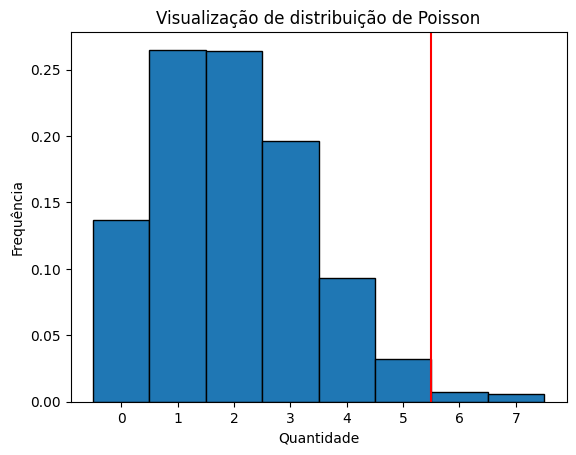

In [22]:
import matplotlib.pyplot as plt
plt.hist(data, bins=range(min(data), max(data)+1), align='left', density=True, edgecolor='black')
plt.xlabel('Quantidade')
plt.ylabel('Frequência')
plt.title('Visualização de distribuição de Poisson')

plt.axvline(x=5.5, color='Red')
plt.show()



In [16]:
# probabilidade
# ppf, cdf

from scipy.stats import poisson
k = 0
print(poisson.pmf(k, mean))

0.1353352832366127


In [18]:
# probabilidade aculada
k = 5
print(1 - poisson.cdf(k, mean))


0.016563608480614445


In [19]:
# qual a probabilidade do meu número, numa distribuição do Poisson ser 0 ou ser maior do que 5
k1 = 0
k2 = 5
p1 = poisson.cdf(k1, mean)
p2 = 1 - poisson.cdf(k2, mean)
p_total = p1 + p2
print("A probabilidade do meu valor ser 0 ou >5 é ", p_total)

# Exercício
# Calcular a probabilidade do meu valor em uma distribuição de Poisson ser igual a 1, 3 ou 5 para média 3.


A probabilidade do meu valor ser 0 ou >5 é  0.15189889171722715


In [23]:
# Calcular a probabilidade do meu valor em uma distribuição de Poisson ser igual a 1, 3 ou 5 para média 3.

mean = 3

# 1
k = 1
p1 = poisson.pmf(k, mean)

# 3
k = 3
p2 = poisson.pmf(k, mean)

# 5
k = 5
p3 = poisson.pmf(k, mean)

# probabilidade total
p_total = p1 + p2 + p3

print("A probabilidade do meu valor ser 1, 3 ou 5 é ", p_total)


A probabilidade do meu valor ser 1, 3 ou 5 é  0.4742218262039042


In [ ]:
import math
def poisson_probability(lambd, x):
    return (math.exp(-lambd) * lambd**x) / math.factorial(x)

media = 3

probabilidade_1 = poisson_probability(media, 1)
probabilidade_3 = poisson_probability(media, 3)
probabilidade_5 = poisson_probability(media, 5)

print(f"Probabilidade de X = 1: {probabilidade_1:.4f}")
print(f"Probabilidade de X = 3: {probabilidade_3:.4f}")
print(f"Probabilidade de X = 5: {probabilidade_5:.4f}")



In [25]:
# Distribuição de Poisson
#
# O Y (a variável de interesse) tem a distribuição semelhante a curva de Poisson
# Cross validation => Validação cruzada

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statsmodels.api as sm

file = '/content/sample_data/comptagesvelo2015.csv'
df = pd.read_csv(file)
df


,Date,Unnamed: 1,Berri1,Boyer,Brébeuf,CSC (Côte Sainte-Catherine),Maisonneuve_1,Maisonneuve_2,Maisonneuve_3,Notre-Dame,...,Pont_Jacques_Cartier,Rachel / Hôtel de Ville,Rachel / Papineau,René-Lévesque,Saint-Antoine,Saint-Laurent U-Zelt Test,Saint-Urbain,Totem_Laurier,University,Viger
0,01/01/2015,00:00,58,12,4,17,33.0,49,21,16,...,NaN,58,91,24,3,NaN,17,78,21,6
1,02/01/2015,00:00,75,7,5,15,30.0,113,27,9,...,NaN,109,177,32,13,NaN,11,57,77,4
2,03/01/2015,00:00,79,7,3,7,30.0,107,36,12,...,NaN,71,131,33,5,NaN,14,174,40,5
3,04/01/2015,00:00,10,1,21,0,10.0,35,29,1,...,NaN,6,11,6,1,NaN,1,20,6,0
4,05/01/2015,00:00,42,0,2,0,27.0,90,21,1,...,NaN,0,5,49,20,NaN,0,41,56,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
314,11/11/2015,00:00,3044,1931,2828,1393,NaN,3603,1754,1142,...,950.0,2328,3280,1210,338,4065.0,1534,1527,2860,356
315,12/11/2015,00:00,1751,930,1670,888,NaN,2048,700,675,...,467.0,1345,1877,755,180,2336.0,960,955,1777,198
316,13/11/2015,00:00,1818,906,1711,873,NaN,2115,634,477,...,482.0,1416,1980,719,204,2628.0,978,1040,1727,258
317,14/11/2015,00:00,979,759,978,322,NaN,1112,290,310,...,266.0,1061,1448,269,70,1876.0,640,805,737,73


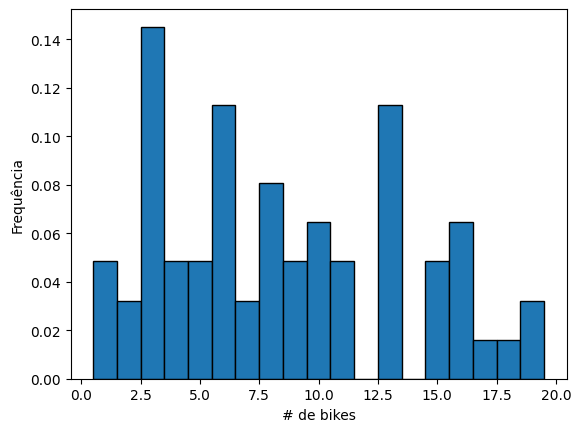

In [35]:

df1 = df[['Maisonneuve_1','Maisonneuve_2','Maisonneuve_3']]
df1 = df1.dropna(how='any')
df1['Maisonneuve_1'] = df1['Maisonneuve_1'] / 10
df1['Maisonneuve_1'] = df1['Maisonneuve_1'].astype(int)

df1['Maisonneuve_2'] = df1['Maisonneuve_2'] / 10
df1['Maisonneuve_2'] = df1['Maisonneuve_2'].astype(int)

df1['Maisonneuve_3'] = df1['Maisonneuve_3'] / 10
df1['Maisonneuve_3'] = df1['Maisonneuve_3'].astype(int)

# Maisonneuve_1: variável de interesse (Y)
# Maisonneuve_2, Maisonneuve_3: regressores escolhidos

values = df1['Maisonneuve_1'].to_numpy()
plt.hist(values, bins=range(min(values), max(values)+1), align="left", density=True, edgecolor="Black")
plt.xlabel("# de bikes")
plt.ylabel("Frequência")
plt.show()


In [37]:
from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures


model = linear_model.PoissonRegressor()
x = df1[['Maisonneuve_2','Maisonneuve_3']].to_numpy()
y = df1['Maisonneuve_1'].to_numpy()
model.fit(x, y)
print(model.score(x, y)) # R^2: 0.77

model = linear_model.LinearRegression()
model.fit(x, y)
print(model.score(x, y)) # R^2: 0.78

poly_features = PolynomialFeatures(degree=2)
x_poly = poly_features.fit_transform(x)
model_poly = linear_model.LinearRegression()
model_poly.fit(x_poly, y)
score_polynomial = model_poly.score(x_poly, y)
print(score_polynomial)



# Validação cruzada:
# se o R² do modelo linear for maior que o R² do Poisson, então Linear é o melhor modelo
# se o R² do modelo linear for menor que o R² do Poisson, então Poisson é o melhor modelo


0.7736401348506257
0.7812720870522996
0.8125831763028031
